# EDA(Exploratory Data Analysis)와 Data 전처리, 모델 분석 실습

## 학습목표
- 타이타닉 승객 데이터 분석을 통해 데이터 분석 과정을 복습한다.
- 데이터 전처리 과정에 초점을 맞추고 머신러닝 기반의 타이타닉 생존자 예측 모델 개발을 수행한다.

# Kaggle (캐글)

- 호주의 멜버른 기반 스타트업 기업
- Data Scientist들이 머신러닝을 이용해 주어진 과제에 대한 답을 찾아 제출하는 일종의 경연 사이트(http://www.kaggle.com/)
- 캐글을 이용하는 Data Scientist는 대략 60만 명(2017년 3월 기준) → 등록 이용자 500만 명(21년 7월)
- 2017년 3월 구글이 캐글을 인수(https://www.oss.kr/news/show/73482470-f684-4624-80fa-141f96b9a0d6)

- 캐글은 빅데이터 분석 플랫폼 업체; 문제해결, 학습, 전문가 조언 등...

## [캐글 사이트 이용 방법]

- 기업이나 기관들이 해결하고자 하는 문제를 온라인으로 캐글 사이트에 등록(일종의 크라우드 소싱)
- 데이터, 목표, 마감 시한, 보상 조건 등의 관련 정보 명시
- Data Scientist들이 일정 기간 이 문제를 경쟁적으로 풀게 됨
- 경합을 통해 경쟁순위가 정해지며 우승자에게는 보상과 명예가 주어짐
- e.g. 헤리티지 건강 재단에서는 "다음 해에 병원에 가야 할 환자"에 대한 예측 문제를 캐글에 올렸고, 9백여 개의 Data Scientist 팀들이 경합을 벌임, 약 1년 동안 경합이 진행되었으며 총상금은 3백만 달러였음

## 1. 데이터 준비

- 데이터 로딩 불러오기

In [28]:
import pandas as pd

In [29]:
train = pd.read_csv('../Data/titanic/train.csv', index_col='PassengerId')

In [30]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
train.shape

(891, 11)

In [32]:
test = pd.read_csv('../Data/titanic/test.csv', index_col='PassengerId')
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [33]:
test.shape

(418, 10)

- index 정리하기

## 2. 데이터 전처리

- 성별 인코딩

In [34]:

train.loc[train.Sex == 'male', 'Sex_encode'] = 0
train.loc[train.Sex == 'female', 'Sex_encode'] = 1

In [35]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [36]:
test.loc[test.Sex == 'male', 'Sex_encode'] = 0
test.loc[test.Sex == 'female', 'Sex_encode'] = 1

In [37]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0


- 호칭 컬럼 만들기

In [38]:
def find_title(name):
    return name.split(',')[1].split('.')[0]

In [39]:
                                                    #위 함수 적용; apply()
train['Title'] = train['Name'].apply(find_title)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,Title
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,Mr


<Axes: xlabel='Title', ylabel='count'>

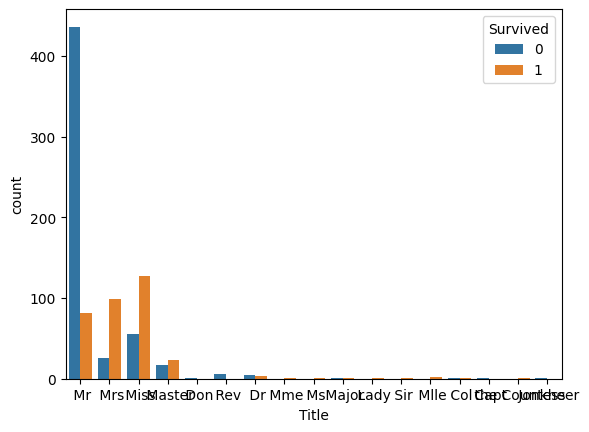

In [40]:
import seaborn as sns
sns.countplot(data = train, x="Title", hue="Survived")

- Embarked - One-Hot-Encoding; 해당값만 1을 주고 나머지는 0(dummy_var)으로 처리

In [41]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,Title
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,Mr
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0.0,Mr
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0.0,Mr
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0.0,Master
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1.0,Mrs


In [42]:
train_embarked = pd.get_dummies(train["Embarked"], prefix = "Embarked")
train_embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,False,False,True
2,True,False,False
3,False,False,True
4,False,False,True
5,False,False,True


In [43]:
train = pd.concate([])

AttributeError: module 'pandas' has no attribute 'concate'

In [ ]:
test_embarked = pd.get_dummies(test["Embarked"], prefix = "Embarked")
test_embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
892,False,True,False
893,False,False,True
894,False,True,False
895,False,False,True
896,False,False,True


- 데이터 합치기
- train + train_embarked, test + test_embarked

In [ ]:
      # column을 기준으로 합침, axis=1

In [ ]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,Title
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,Mr


In [44]:
train = pd.concat([train, train_embarked], axis=1) 
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,Title,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,Mr,False,False,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,Mrs,True,False,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,Miss,False,False,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,Mrs,False,False,True
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,Mr,False,False,True


In [47]:
test = pd.concat([test, test_embarked], axis=1) 
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,False,True,False
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0,False,False,True
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0,False,True,False
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0,False,False,True
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0,False,False,True


# EDA: 탐색적 분석

In [ ]:
import seaborn as sns

- Countplot

<Axes: xlabel='SibSp', ylabel='count'>

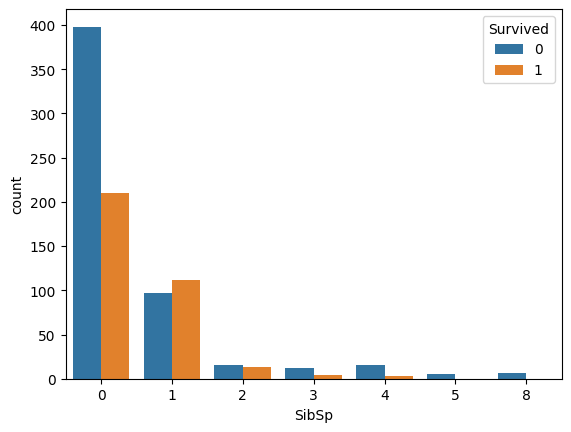

In [ ]:
sns.countplot(data=train, x='SibSp', hue='Survived')

<Axes: xlabel='Parch', ylabel='count'>

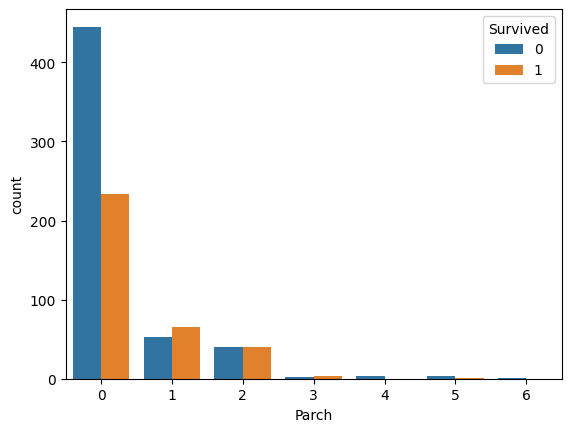

In [ ]:
sns.countplot(data=train, x='Parch', hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

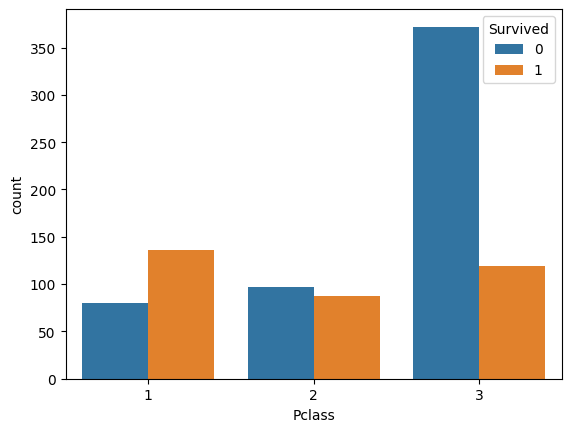

In [ ]:
sns.countplot(data=train, x="Pclass", hue="Survived")

<Axes: xlabel='Sex', ylabel='count'>

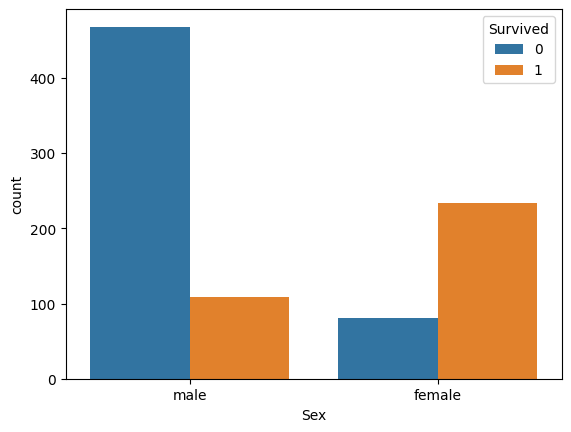

In [ ]:
sns.countplot(data=train, x="Sex", hue="Survived")

In [ ]:
# countplot, x="SibSp"

In [ ]:
# countplot, x="Parch" 

## Train/Test 데이터 셋 만들기

In [45]:
features = ['Pclass', 'Sex_encode', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X_train = train[features]
X_train

,Pclass,Sex_encode,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,
1,3,0.0,1,0,False,False,True
2,1,1.0,1,0,True,False,False
3,3,1.0,0,0,False,False,True
4,1,1.0,1,0,False,False,True
5,3,0.0,0,0,False,False,True
...,...,...,...,...,...,...,...
887,2,0.0,0,0,False,False,True
888,1,1.0,0,0,False,False,True
889,3,1.0,1,2,False,False,True


In [49]:
y_train = train['Survived']
y_train

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [48]:
X_test = test[features]
X_test

,Pclass,Sex_encode,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,
892,3,0.0,0,0,False,True,False
893,3,1.0,1,0,False,False,True
894,2,0.0,0,0,False,True,False
895,3,0.0,0,0,False,False,True
896,3,1.0,1,1,False,False,True
...,...,...,...,...,...,...,...
1305,3,0.0,0,0,False,False,True
1306,1,1.0,0,0,True,False,False
1307,3,0.0,0,0,False,False,True


- Decision Tree(머신러닝)

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
# DecisionTreeClassifier 객체를 행성한다. 생성된 DecisionTreeClassifier 객체의 fit() 을 이용해서 학습용 데이터의 feature 데이터, target 데이터를 이용하여서 학습을 수행한다.
model = DecisionTreeClassifier(max_depth = 5)

> - 학습

In [56]:

model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

> - 예측

In [58]:
predict = model.predict(X_test)

## Submission

In [59]:
submission = pd.read_csv('../Data/titanic/gender_submission.csv', index_col = 'PassengerId')
submission['Survived'] = predict

In [60]:
submission.to_csv('../Data/titanic/my_submission.csv')

In [61]:
# from sklearn.metrics import accuracy_score
# print(accuracy_score(y_test, predict))

- 모델의 성능을 높이기 위해 변수를 추가하거나 알고리즘을 변경하는 등의 방법 사용 가능
- 'Title' 등을 추가하거나 RandomForestClassifier(n_estimators = , max_depth = ) 등 이용